In [2]:
import torch
import torch.nn as nn
from torchview import draw_graph
import graphviz

# -------------------------
# 1. DEFINE YOUR MODEL (Same as before)
# -------------------------
class ScratchMaskCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ScratchMaskCNN, self).__init__()

        # Block 1
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Block 2
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Block 3
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Adaptive Pool (The improvement we added)
        self.avgpool = nn.AdaptiveAvgPool2d((4, 4))

        # Classifier
        self.fc = nn.Sequential(
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# -------------------------
# 2. GENERATE THE DIAGRAM
# -------------------------
if __name__ == '__main__':
    print("Generating network diagram...")
    
    # Initialize the model
    model = ScratchMaskCNN()
    
    # Create the graph
    # input_size = (Batch_Size, Channels, Height, Width)
    model_graph = draw_graph(model, input_size=(1, 3, 128, 128), expand_nested=True)
    
    # Save as PNG
    try:
        model_graph.visual_graph.render("mask_cnn_architecture", format="png")
        print("✅ Success! Check your folder for 'mask_cnn_architecture.png'")
    except Exception as e:
        print(f"❌ Error: Could not render image. Did you install Graphviz software?\nError details: {e}")

Generating network diagram...
❌ Error: Could not render image. Did you install Graphviz software?
Error details: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH


In [4]:
import torch
import torch.nn as nn
from torchview import draw_graph
import os

# --- FIX FOR WINDOWS USERS ---
# Add the Graphviz 'bin' folder to your system path inside Python
# Check which path exists on your laptop and uncomment it:

# OPTION A: Standard Installation
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# OPTION B: If you installed it in Program Files (x86)
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'
# -----------------------------

# 1. DEFINE MODEL (Your ScratchMaskCNN class)
class ScratchMaskCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ScratchMaskCNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((4, 4))
        self.fc = nn.Sequential(
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(), nn.Dropout(0.5), nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# 2. GENERATE DIAGRAM
if __name__ == '__main__':
    print("Generating diagram...")
    try:
        model = ScratchMaskCNN()
        model_graph = draw_graph(model, input_size=(1, 3, 128, 128), expand_nested=True)
        model_graph.visual_graph.render("mask_cnn_architecture", format="png")
        print("✅ Success! Check your folder for 'mask_cnn_architecture.png'")
    except Exception as e:
        print("\n❌ STILL FAILING?")
        print("Please check if 'C:/Program Files/Graphviz/bin' actually exists on your laptop.")
        print("If not, find where you installed Graphviz and copy that path into the code.")
        print(f"Error details: {e}")

Generating diagram...



(process:31544): Pango-WARNING **: 14:01:25.854: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


✅ Success! Check your folder for 'mask_cnn_architecture.png'



(process:4452): Pango-WARNING **: 11:27:03.172: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


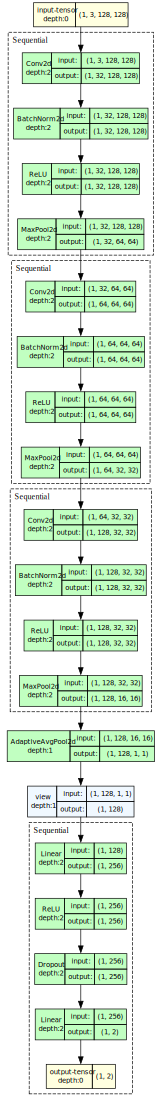

In [ ]:
import torch
import torch.nn as nn
from torchview import draw_graph

# load your model
model = torch.load("Models/scratch_mask_cnn_best.pth", map_location="cpu", weights_only=False)
model.eval()

# dummy input (same size used in training)
dummy = torch.randn(1, 3, 128, 128)

# draw model
graph = draw_graph(model, input_data=dummy, expand_nested=True)

graph.visual_graph
